In [1]:
#seach for organic tweets and save them in one list
from collections import Counter
import csv
tweets=[]
positive_tweets = 0
negative_tweets = 0
other_tweets = 0

with open( 'D:\AllSamplesPositiveandNeutral.csv', "rb" ) as theFile:
    reader = csv.DictReader( theFile )
    for row in reader:
        if row['sent']== '1':
            positive_tweets += 1
        elif row['sent']== '-1':
            negative_tweets += 1
        else:
            other_tweets += 1
        
        tweets.append(row) 
print 'We have', len(tweets), 'sampled tweets'
print positive_tweets, 'are positive'
print negative_tweets, 'are negative'
print other_tweets, 'are nothing'

We have 2000 sampled tweets
676 are positive
0 are negative
1324 are nothing


In [2]:
# Create label vector (y) that show the class labels of each tweet
#print the count of each class label
from collections import Counter
import numpy as np
y = np.array([int(t['sent']) for t in tweets])#savind labels of the class in y
print 'label counts=', Counter(y)


label counts= Counter({0: 1324, 1: 676})


Populating the interactive namespace from numpy and matplotlib


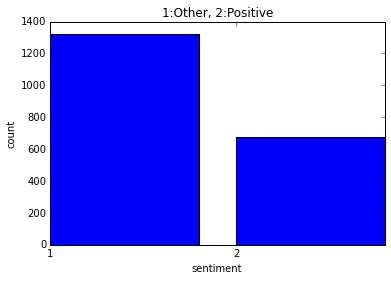

In [3]:
%pylab inline
# What is the distribution of scores?
from collections import Counter
import matplotlib.pyplot as plt

counts = Counter(y).values()
vals = [1,2]

plt.bar(vals, counts)
plt.xticks(vals)
plt.xlabel('sentiment')
plt.ylabel('count')
plt.title('1:Other, 2:Positive')
plt.show()

In [183]:
"""Best tokenization configuration: lower=True, punct=True,url=False,mention=True
8312 unique terms in vocabulary
acc= 0.814"""

import re
def tokenize1(string, lowercase=True, keep_punctuation=True,collapse_urls=False, collapse_mentions=True):
    if not string:
        return []
    if lowercase:
        string = string.lower()
    tokens = []
    if collapse_urls:
        string = re.sub('http\S+', 'THIS_IS_A_URL', string)
    if collapse_mentions:
        string = re.sub('@\S+', 'THIS_IS_A_MENTION', string)
    if keep_punctuation:
        tokens = string.split()
    else:
        tokens = re.sub('\W+', ' ', string).split()
    return tokens

def tweet2tokens(tweet, lowercase=True,keep_punctuation=True,collapse_urls=True, collapse_mentions=True):
    #print('tweet:', tweet)
    tokens = tokenize1(tweet['text'], lowercase, keep_punctuation, collapse_urls, collapse_mentions)
    return tokens


In [184]:
# Let's tokenize all tweets.
tokens_list = [tweet2tokens(t, lowercase=True,keep_punctuation=False,collapse_urls=True, collapse_mentions=True) for t in tweets]

In [185]:
tokens_list[1]

['THIS_IS_A_MENTION',
 'anything',
 'that',
 'attracts',
 'people',
 'away',
 'from',
 'tobacco',
 'cigarettes',
 'is',
 'a',
 'good',
 'thing',
 'inc',
 'ecig',
 'flavours',
 'euecigban']

In [186]:
for t in range(len(tokens_list)):
    print tokens_list[t]
    break

['vaping', 'kush', 'gt', 'smoking', 'kush']


In [187]:
for t in tweets:
    print t['text']
    break

Vaping kush&gt;Smoking kush


In [188]:
#use after pre processing 
# Create feature vectors (X)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='ignore')# CountVectorizer(decode_error='ignore',lowercase =False)
X = vectorizer.fit_transform(t['text'] for t in tweets)
print 'default - vectorized %d tweets. found %d terms.' % (X.shape[0], X.shape[1])

default - vectorized 2000 tweets. found 7370 terms.


In [189]:
#use after pre processing 
# Create feature vectors (X)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='ignore', lowercase=False)
X = vectorizer.fit_transform(t['text'] for t in tweets)
print 'no lower case vectorized %d tweets. found %d terms.' % (X.shape[0], X.shape[1])

no lower case vectorized 2000 tweets. found 8439 terms.


In [190]:
#use after pre processing 
# Create feature vectors (X)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='ignore', lowercase=True, stop_words='english')# CountVectorizer(decode_error='ignore',lowercase =False)
X = vectorizer.fit_transform(t['text'] for t in tweets)
print 'lower case, stop words - vectorized %d tweets. found %d terms.' % (X.shape[0], X.shape[1])

lower case, stop words - vectorized 2000 tweets. found 7140 terms.


In [191]:
tweets_text=[]
for t in tweets:
    tweets_text.append(t['text'])
    
for t in tweets_text:
    print t
    break

Vaping kush&gt;Smoking kush


In [192]:
# Create feature vectors (X)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='ignore', ngram_range=(1, 1),max_df=1.0, min_df=2, tokenizer=tokenize1,binary=False)#lowercase, url's, mentions
X = vectorizer.fit_transform(t['text'] for t in tweets)
print 'vectorized %d tweet. found %d terms.' % (X.shape[0], X.shape[1])

vectorized 2000 tweet. found 2159 terms.


In [193]:
print vectorizer.vocabulary_.items()[:20]

[(u"friend's", 866), (u'straight', 1788), (u'her.', 979), (u'#suryaray', 80), (u'whose', 2087), (u'#euecigban', 44), (u'here', 980), (u'china', 499), (u'kids', 1118), (u"i'd", 1044), (u"i'm", 1046), (u'music', 1324), (u'care', 464), (u'until', 1971), (u'thuis', 1899), (u'glass', 908), (u'http://t.co/rgylakkdpq', 1028), (u'wana', 2044), (u'want', 2046), (u'absolute', 231)]


In [194]:
# What are the most frequent terms?
# Sum columns:
col_sums = X.sum(axis=0).tolist()[0]
# Sort sums in descending order, and return the indices
top_indices = np.argsort(col_sums)[::-1]
print 'top_indices=', top_indices
vocab = np.array(vectorizer.get_feature_names())
top_terms = vocab[top_indices]
print 'top_terms:\n', '\n'.join('%s %d' % (term, count) for term, count in zip(top_terms, top_indices)[:10])

top_indices= [ 226 1859 1621 ..., 1642  587  379]
top_terms:
THIS_IS_A_MENTION 226
the 1859
rt 1621
to 1910
i 1043
a 227
electronic 756
my 1327
in 1060
and 292


In [196]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression

def do_cv(X, y, nfolds=10):
    cv = KFold(len(y), nfolds)
    return np.mean(cross_val_score(LogisticRegression(), X, y, cv=cv))
  
print do_cv(X, y)

0.796


In [182]:
# Fit a LogisticRegression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

# Compute accuracy
def accuracy(truth, predicted):
    return (1. * len([1 for tr, pr in zip(truth, predicted) if tr == pr]) / len(truth))

predicted = model.predict(X)
print 'accuracy on training data=%.3f' % accuracy(y, predicted)


# 5 Cross-validation accuracy
from sklearn.cross_validation import KFold

cv = KFold(len(y), 10)
accuracies = []
print 'Fitting in the labeled data:'
#print 'Train set:',X[train_ind].shape[0], '\f Test set:', X[test_ind].shape[0]
for train_ind, test_ind in cv:
    model.fit(X[train_ind], y[train_ind])
    
    predictions = model.predict(X[test_ind])
    accuracies.append(accuracy(y[test_ind], predictions))
    
print 'Average 5-fold cross validation accuracy=%.2f (std=%.2f)' % (np.mean(accuracies), np.std(accuracies))

accuracy on training data=0.864
Fitting in the labeled data:
Average 5-fold cross validation accuracy=0.81 (std=0.03)


In [23]:
p=0
n=0
o=0
for i in model.predict(X):
    if i==1:
        p+=1
    elif i==-1:
        n+=1
    else:
        o+=1

print n
print o
print p
print len(model.predict(X))

0
1495
505
2000


In [24]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
import pandas as pd


y_pred = model.predict(X)

def confusion_matrix(y_test, y_pred):
    cm = sk_confusion_matrix(y, y_pred)
    cm = pd.DataFrame(data=cm, columns=[0,1], index=[0,1])
    cm.columns.name = 'Predicted'
    cm.index.name = 'Expected'
    error_rate = (y_pred != y).mean()
    print('error rate: %.2f' % error_rate)
    return cm
    
confusion_matrix(y, y_pred)

error rate: 0.14


Predicted,0,1
Expected,,
0,1267,57
1,228,448


In [25]:
#precision, recall and F1 measures for both classes
from sklearn.metrics import precision_recall_fscore_support
y_true = y
y_pred = model.predict(X)
print '1',precision_recall_fscore_support(y_true, y_pred)

1 (array([ 0.84749164,  0.88712871]), array([ 0.95694864,  0.66272189]), array([ 0.89890032,  0.75867909]), array([1324,  676], dtype=int64))


In [26]:
#confusion matrix again
y_pred = model.predict(X)
def create_conf_matrix(expected, predicted, n_classes):
    m = [[0] * n_classes for i in range(n_classes)]
    for pred, exp in zip(predicted, expected):#combining predicted and expected values like (1,0) and 
        m[pred][exp] += 1 #adding to those same positions a count
    return m

print create_conf_matrix(y, y_pred,2)

[[1267, 228], [57, 448]]


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizing(tweets, vectorizer):
    X = vectorizer.fit_transform(t['text'] for t in tweets)
    print 'X dimensions=', X.shape
    return X

(1, 1)
X dimensions= (2000, 5760)
(1, 2)
X dimensions= (2000, 23826)
(2, 2)
X dimensions= (2000, 18066)
(1, 3)
X dimensions= (2000, 46211)
(2, 3)
X dimensions= (2000, 40451)
(3, 3)
X dimensions= (2000, 22385)


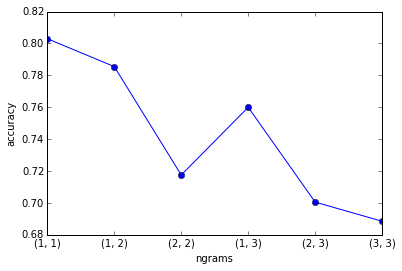

In [29]:
# How does using ngrams help?
import matplotlib.pyplot as plt

def compare_ngrams(tweets, y):
    accuracies = []
    ngrams = [(1,1), (1,2), (2,2), (1,3), (2, 3), (3,3)]
    for ngram in ngrams:
        print ngram
        accuracies.append(do_cv(tokenizing(tweets, TfidfVectorizer(decode_error='ignore', ngram_range=ngram, tokenizer=tokenize1)), y))
    plt.figure()
    plt.plot(accuracies, 'bo-')
    plt.xticks(range(len(ngrams)), ngrams)
    plt.xlabel('ngrams')
    plt.ylabel('accuracy')
    plt.show()
        
compare_ngrams(tweets, y)

X dimensions= (2000, 5760)
X dimensions= (2000, 5760)
X dimensions= (2000, 1996)
X dimensions= (2000, 1271)
X dimensions= (2000, 928)
X dimensions= (2000, 723)
X dimensions= (2000, 599)
X dimensions= (2000, 503)
X dimensions= (2000, 437)
X dimensions= (2000, 397)
X dimensions= (2000, 355)
X dimensions= (2000, 317)
X dimensions= (2000, 285)
X dimensions= (2000, 263)
X dimensions= (2000, 236)
X dimensions= (2000, 220)
X dimensions= (2000, 213)
X dimensions= (2000, 205)
X dimensions= (2000, 198)
X dimensions= (2000, 193)


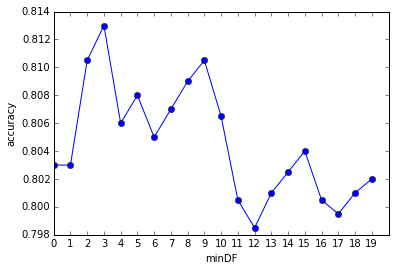

In [33]:
def compare_mindDF(tweets, y):
    accuracies = []
    for freq in range(20):
        accuracies.append(do_cv(tokenizing(tweets, TfidfVectorizer(decode_error='ignore', tokenizer=tokenize1,ngram_range=(1,1),
                                                                   min_df=freq)), y))
    plt.figure()
    plt.plot(accuracies, 'bo-')
    plt.xticks(range(20))
    plt.xlabel('minDF')
    plt.ylabel('accuracy')
    plt.show()
        
compare_mindDF(tweets, y)

1.0
X dimensions= (2000, 5760)
0.1
X dimensions= (2000, 5737)
0.05
X dimensions= (2000, 5719)
0.04
X dimensions= (2000, 5714)
0.03
X dimensions= (2000, 5697)
0.02
X dimensions= (2000, 5673)
0.01
X dimensions= (2000, 5586)
0.005
X dimensions= (2000, 5443)
0.001
X dimensions= (2000, 4489)


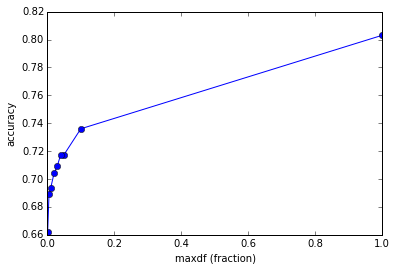

In [35]:
# How does filtering common words affect accuracy?
import matplotlib.pyplot as plt

def compare_maxdf(tweets, y):
    accuracies = []
    maxdfs = [1., .1, .05, .04, .03, .02, .01, .005, .001]
    for freq in maxdfs:
        print freq
        accuracies.append(do_cv(tokenizing(tweets, TfidfVectorizer(decode_error='ignore',max_df=freq, tokenizer=tokenize1, 
                                                                   ngram_range=(1,1))), y))
    plt.figure()
    plt.plot(maxdfs, accuracies, 'bo-')
    plt.xlabel('maxdf (fraction)')
    plt.ylabel('accuracy')
    plt.show()
        
compare_maxdf(tweets, y)

True
X dimensions= (2000, 1271)
False
X dimensions= (2000, 1271)


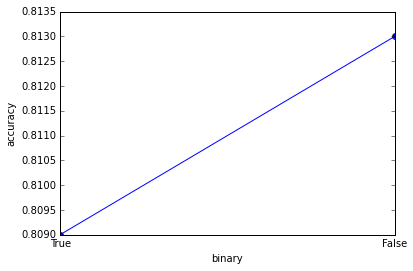

In [37]:
# Does binary/freq help?
def compare_binary(tweets, y):
    accuracies = []
    choices = [True, False]
    for choice in choices:
        print choice
        accuracies.append(do_cv(tokenizing(tweets, TfidfVectorizer(decode_error='ignore',binary=choice, 
                                                                   min_df=3, ngram_range=(1,1), max_df=1.0, tokenizer=tokenize1)), y))
    plt.figure()
    plt.plot(accuracies, 'bo-')
    plt.xticks([0,1], [str(c) for c in choices])
    plt.xlabel('binary')
    plt.ylabel('accuracy')
    plt.show()
        
compare_binary(tweets, y)

True
X dimensions= (2000, 1285)
False
X dimensions= (2000, 1285)


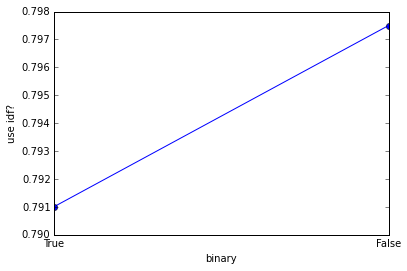

In [38]:
# Does idf help?
def compare_idf(tweets, y):
    accuracies = []
    choices = [True, False]
    for choice in choices:
        print choice
        accuracies.append(do_cv(tokenizing(tweets, TfidfVectorizer(decode_error='ignore',use_idf=choice, 
                                                                   binary=False, min_df=3, ngram_range=(1,1), max_df=1.)), y))
    plt.figure()
    plt.plot(accuracies, 'bo-')
    plt.xticks([0,1], [str(c) for c in choices])
    plt.xlabel('binary')
    plt.ylabel('use idf?')
    plt.show()
        
compare_idf(tweets, y)

None
X dimensions= (2000, 1271)
english
X dimensions= (2000, 1092)


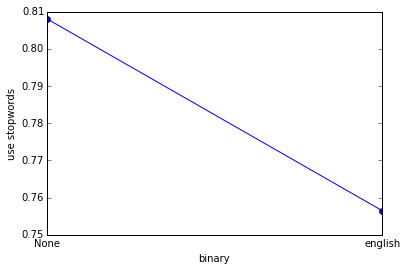

In [39]:
# Do stop words help?
def compare_stopwords(tweets, y):
    accuracies = []
    choices = [None, 'english']
    for choice in choices:
        print choice
        accuracies.append(do_cv(tokenizing(tweets, TfidfVectorizer(decode_error='ignore',stop_words=choice,
                                                                 use_idf=False, binary=False, min_df=3, ngram_range=(1,1),
                                                                   tokenizer=tokenize1, max_df=1.0)), y))
    plt.figure()
    plt.plot(accuracies, 'bo-')
    plt.xticks([0,1], [str(c) for c in choices])
    plt.xlabel('binary')
    plt.ylabel('use stopwords')
    plt.show()
        
compare_stopwords(tweets, y)

In [46]:
# Do GridSearch on all parameters.
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint

pipeline = Pipeline([
    ('vect', TfidfVectorizer(decode_error='ignore',tokenizer=tokenize1)),
    ('clf', LogisticRegression()),
])

parameters = {
    'vect__min_df': (1, 2, 3, 4, 5),
    'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),  # unigrams or bigrams or trigrams
    'vect__use_idf': (True, False),
    'vect__max_df':(1., .1, .05, .04, .03),
    'vect__tokenizer':(None, tokenize1)
}

data = [t['text'] for t in tweets]
grid_search = GridSearchCV(pipeline, parameters, verbose=1, cv=KFold(len(y), 10))

print "Performing grid search..."
print "pipeline:", [name for name, _ in pipeline.steps]
print "parameters:"
pprint(parameters)
grid_search.fit(data, y)
print "done."

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done 200 jobs       | elapsed:   34.8s
[Parallel(n_jobs=1)]: Done 450 jobs       | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 800 jobs       | elapsed:  2.5min
[Parallel(n_jobs=1)]: Done 1250 jobs       | elapsed:  4.0min
[Parallel(n_jobs=1)]: Done 1800 jobs       | elapsed:  6.1min
[Parallel(n_jobs=1)]: Done 2450 jobs       | elapsed:  8.2min


Performing grid search...
pipeline: ['vect', 'clf']
parameters:
{'vect__max_df': (1.0, 0.1, 0.05, 0.04, 0.03),
 'vect__min_df': (1, 2, 3, 4, 5),
 'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),
 'vect__tokenizer': (None, <function tokenize1 at 0x000000000ABD3CF8>),
 'vect__use_idf': (True, False)}
Fitting 10 folds for each of 300 candidates, totalling 3000 fits
done.
Best score: 0.812
Best parameters set:
	vect__max_df: 1.0
	vect__min_df: 2
	vect__ngram_range: (1, 1)
	vect__tokenizer: <function tokenize1 at 0x000000000ABD3CF8>
	vect__use_idf: True


[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed: 10.2min finished


In [51]:
print '\n'.join(str(x) for x in grid_search.grid_scores_)

mean: 0.79450, std: 0.03751, params: {'vect__ngram_range': (1, 1), 'vect__tokenizer': None, 'vect__use_idf': True, 'vect__min_df': 1, 'vect__max_df': 1.0}
mean: 0.79400, std: 0.03353, params: {'vect__ngram_range': (1, 1), 'vect__tokenizer': None, 'vect__use_idf': False, 'vect__min_df': 1, 'vect__max_df': 1.0}
mean: 0.81150, std: 0.02967, params: {'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize1 at 0x000000000ABD3CF8>, 'vect__use_idf': True, 'vect__min_df': 1, 'vect__max_df': 1.0}
mean: 0.80800, std: 0.03084, params: {'vect__ngram_range': (1, 1), 'vect__tokenizer': <function tokenize1 at 0x000000000ABD3CF8>, 'vect__use_idf': False, 'vect__min_df': 1, 'vect__max_df': 1.0}
mean: 0.78750, std: 0.04429, params: {'vect__ngram_range': (1, 2), 'vect__tokenizer': None, 'vect__use_idf': True, 'vect__min_df': 1, 'vect__max_df': 1.0}
mean: 0.78550, std: 0.03602, params: {'vect__ngram_range': (1, 2), 'vect__tokenizer': None, 'vect__use_idf': False, 'vect__min_df': 1, 'vect__max_d

In [200]:
# What are the top weighted features?

# Get the learned coefficients for the Positive class.
coef = model.coef_[0]
print coef
# Sort them in descending order.
top_coef_ind = np.argsort(coef)[::-1]
print '..',top_coef_ind
# Get the names of those features.
top_coef_terms = vocab[top_coef_ind]
print top_coef_terms
# Get the weights of those features
top_coef = coef[top_coef_ind]
# Print the top 10.
print 'top weighted terms for positive class:\n', \
    '\n'.join('%s %.2f' % (term, weight) for term, weight in zip(top_coef_terms, top_coef)[:10])

[ 0.35752895 -0.1472319   0.31811443 ...,  0.23925308 -0.07574558
 -0.07574558]
.. [5170 1608 1022 ..., 4197 1033  200]
[u'vaping' u'ecig' u'cig' ..., u's' u'cigarettes' u'THIS_IS_A_URL']
top weighted terms for positive class:
vaping 2.88
ecig 2.29
cig 2.15
vape 2.02
m 1.79
need 1.57
got 1.56
green 1.52
good 1.33
love 1.25


In [61]:
import numpy as np

vocabWords = []
coefValues = []
test = []

for x in range(0,1999):#for each tweet in X
    for i in X[x].indices:#for each word in that tweet
        coefValues.append(model.coef_[0][i])#get the model coeficient from logistic regression for each term 
    #for each coeficient, and tfidf value for that tweet make a dot product and keeps in a vector
    test.append([(p*q,value,term) for p,q,value,term in zip(coefValues, X[x].data,X[x].indices,vocab[X[x].indices])])
    
for t in range(len(test)):#print final result of dot product 
    print 'tweet #', t, tweets[t]['text'], '\n', test[t], '\n'


#for t in range(len(test)):
#    print test[t].data, test[t].indices
#    for i in test[t].indices:
#        vocabWords.append(vocab[i])
#    print '\n'.join('%s %.4f' % (term, weight) for term, weight in zip(vocabWords, test[t].data))
#    break
#for x in range(0,1999):
#    print 'tweet #',x,'\n', X[x], '\n'"""

tweet # 0 Vaping kush&gt;Smoking kush 
[(-0.0093223357976018641, 4462, u'smoking'), (0.070775870236291907, 2223, u'gt'), (0.33385682048028614, 2776, u'kush'), (0.58138419722705315, 5170, u'vaping')] 

tweet # 1 @LindaMcAvanMEP anything that attracts people away from tobacco cigarettes is a good thing, inc. ecig flavours. #EUecigBAN 
[(-0.014421528442987774, 1786, u'euecigban'), (0.081438507998999141, 1969, u'flavours'), (0.070726749440861866, 1608, u'ecig'), (0.9201089974978599, 4843, u'thing'), (0.20327316607467752, 2162, u'good'), (0.015988679940467362, 1033, u'cigarettes'), (0.66146245498319767, 4901, u'tobacco'), (0.016023035264097409, 495, u'away'), (0.3653014331933368, 3666, u'people'), (-0.95962252385348634, 465, u'attracts'), (-0.015038736974491122, 199, u'THIS_IS_A_MENTION')] 

tweet # 2 I bought a Ecig today 
[(-0.031340308248520299, 4905, u'today'), (0.14287244730439061, 725, u'bought'), (0.14305307322975286, 1608, u'ecig')] 

tweet # 3 Oh no I'm secondhand ecig high from a 

In [237]:
test = []
>>> vector1 = (2,3,5)
>>> vector2 = (3,4,6)
>>> test=[p*q for p,q in zip(vector1, vector2)]
print test

[6, 12, 30]


In [230]:
# Get the learned coefficients for the Negative class.
coef = model.coef_[0]
# Sort them in descending order.
top_coef_ind = np.argsort(coef)[::-1]
# Get the names of those features.
top_coef_terms = vocab[top_coef_ind]
# Get the weights of those features
top_coef = coef[top_coef_ind]
# Print the top 10.
print 'top weighted terms for negative class:\n', \
    '\n'.join('%s %.2f' % (term, weight) for term, weight in zip(top_coef_terms, top_coef)[:10])

top weighted terms for negative class:
smoking 2.58
class 1.90
people 1.81
shit 1.62
stupid 1.61
pussy 1.57
s 1.54
sorry 1.52
kid 1.48
smoke 1.46


In [64]:
# Get the learned coefficients for the OTHER class.
coef = model.coef_[1]
# Sort them in descending order.
top_coef_ind = np.argsort(coef)[::-1]
# Get the names of those features.
top_coef_terms = vocab[top_coef_ind]
# Get the weights of those features
top_coef = coef[top_coef_ind]
# Print the top 10.
print 'top weighted terms for other class:\n', \
    '\n'.join('%s %.2f' % (term, weight) for term, weight in zip(top_coef_terms, top_coef)[:10])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [128]:
# How does tokenization affect accuracy?
# Collapse urls and mentions; ignore description prefix.
from itertools import product
def run_all(tweets, lowercase=True,
            keep_punctuation=True,
            collapse_urls=True, collapse_mentions=True):
    
    #vectorizer = TfidfVectorizer(decode_error='ignore', tokenizer=tokenize1)#lowercase, url's, mentions
    #B = vectorizer.fit_transform(t['text'] for t in tweets)
    #print B
    
    tokens_list = [tweet2tokens(t, lowercase, keep_punctuation,collapse_urls, collapse_mentions) for t in tweets]
    vocabulary = make_vocabulary(tokens_list)
    A = make_feature_matrix(tokens_list, vocabulary)
    print 'acc=', do_cross_val(A, y, 10)

In [129]:
# Store these in a sparse matrix.

#1) Create a vocabulary (dict from term->index)

# https://docs.python.org/2/library/collections.html#collections.defaultdict
from collections import defaultdict

def make_vocabulary(tokens_list):
    vocabulary = defaultdict(lambda: len(vocabulary))
    for tokens in tokens_list:
        for token in tokens:
            vocabulary[token]
    print '%d unique terms in vocabulary' % len(vocabulary)
    return vocabulary

# Convert features to a sparse matrix X.
# X[i,j] is the frequency of term j in tweet i
# 
from scipy.sparse import lil_matrix #list of list (LIL)

def make_feature_matrix(tokens_list, vocabulary):
    X = lil_matrix((len(tweets), len(vocabulary)))
    for i, tokens in enumerate(tokens_list):
        for token in tokens:
            j = vocabulary[token]
            X[i,j] += 1
    return X.tocsr()


# Do 5-fold cross-validation
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

def do_cross_val(X, y, nfolds):
    """ Compute average cross-validation acccuracy."""
    cv = KFold(len(y), nfolds)
    accuracies = []
    for train_idx, test_idx in cv:
        clf = LogisticRegression()
        clf.fit(X[train_idx], y[train_idx])
        predicted = clf.predict(X[test_idx])
        acc = accuracy_score(y[test_idx], predicted)
        accuracies.append(acc)
    avg = np.mean(accuracies)
    return avg


argnames = ['lower', 'punct', 'url', 'mention']
lowercase_opts = [True, False]
keep_punctuation_opts = [True, False]
url_opts = [True, False]
mention_opts = [True, False]

option_iter = product(lowercase_opts, keep_punctuation_opts,url_opts, mention_opts)

for options in option_iter:
    print '\t'.join('%s=%s' % (name, opt) for name, opt in zip(argnames, options))
    run_all(tweets, *options)
    print

lower=True	punct=True	url=True	mention=True
7653 unique terms in vocabulary
acc= 0.806

lower=True	punct=True	url=True	mention=False
8711 unique terms in vocabulary
acc= 0.802

lower=True	punct=True	url=False	mention=True
8312 unique terms in vocabulary
acc= 0.814

lower=True	punct=True	url=False	mention=False
9370 unique terms in vocabulary
acc= 0.81

lower=True	punct=False	url=True	mention=True
5761 unique terms in vocabulary
acc= 0.808

lower=True	punct=False	url=True	mention=False
6767 unique terms in vocabulary
acc= 0.8095

lower=True	punct=False	url=False	mention=True
6401 unique terms in vocabulary
acc= 0.8045

lower=True	punct=False	url=False	mention=False
7407 unique terms in vocabulary
acc= 0.811

lower=False	punct=True	url=True	mention=True
8638 unique terms in vocabulary
acc= 0.8035

lower=False	punct=True	url=True	mention=False
9701 unique terms in vocabulary
acc= 0.8075

lower=False	punct=True	url=False	mention=True
9297 unique terms in vocabulary
acc= 0.804

lower=False	